In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [5]:
# drop month date nd year
df.drop(['day','month','year','Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
# encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [9]:
# independent and dependant features
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [10]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=42)

In [13]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((183, 11), (61, 11), (183,), (61,))

In [14]:
# feature sel based on corr
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.607478,0.459776,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.691612,-0.345860,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.011260,0.023266,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.354277,-0.301666,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.745644,0.593647,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.657983,0.982049,0.580530,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.503266,0.940947,0.501279,-0.079217
ISI,0.607478,-0.691612,0.011260,-0.354277,0.745644,0.657983,0.503266,1.000000,0.631317,0.745431,0.264224
BUI,0.459776,-0.345860,0.023266,-0.301666,0.593647,0.982049,0.940947,0.631317,1.000000,0.583986,0.093371
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501279,0.745431,0.583986,1.000000,0.158763


In [15]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0,0
181,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,1,1
225,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
104,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0,0


<Axes: >

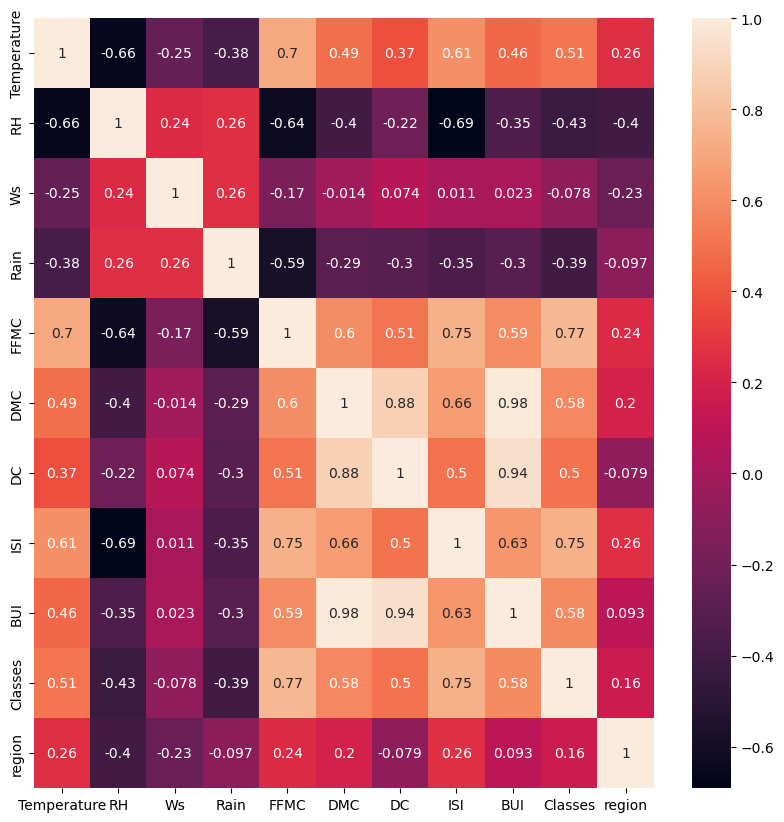

In [16]:
plt.figure(figsize=(10,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset,threshold):
          col_corr=set()
          corr_matrix=dataset.corr()
          for i in range (len(corr_matrix.columns)):
                    for j in range(i):
                              if abs(corr_matrix.iloc[i,j])>threshold:
                                        colname=corr_matrix.columns[i]
                                        col_corr.add(colname)
          return col_corr

In [18]:
# threshhold
corr_feat=correlation(X_train,.85)
corr_feat

{'BUI', 'DC'}

In [19]:
# eatures , when corr is more than .85
X_train.drop(corr_feat,axis=1,inplace=True)
X_test.drop(corr_feat,axis=1,inplace=True)

In [20]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
181,36,56,16,0.0,88.9,23.8,8.2,1,1
225,31,72,14,0.0,84.2,8.3,3.8,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
104,25,86,21,4.6,40.9,1.3,0.1,0,0


In [21]:
X_train.shape,X_test.shape

((183, 9), (61, 9))

## feature scaling or standardisation

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.77409606,
        -1.1098231 , -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.84971776,
         0.9010445 ,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.21666743,
         0.9010445 ,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.08916441,
        -1.1098231 , -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.48617735,
         0.9010445 ,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.87104017,
        -1.1098231 , -1.00547949]])

# box plot to understand rffrct of standard scaler

Text(0.5, 1.0, 'xtrain aftr scaling')

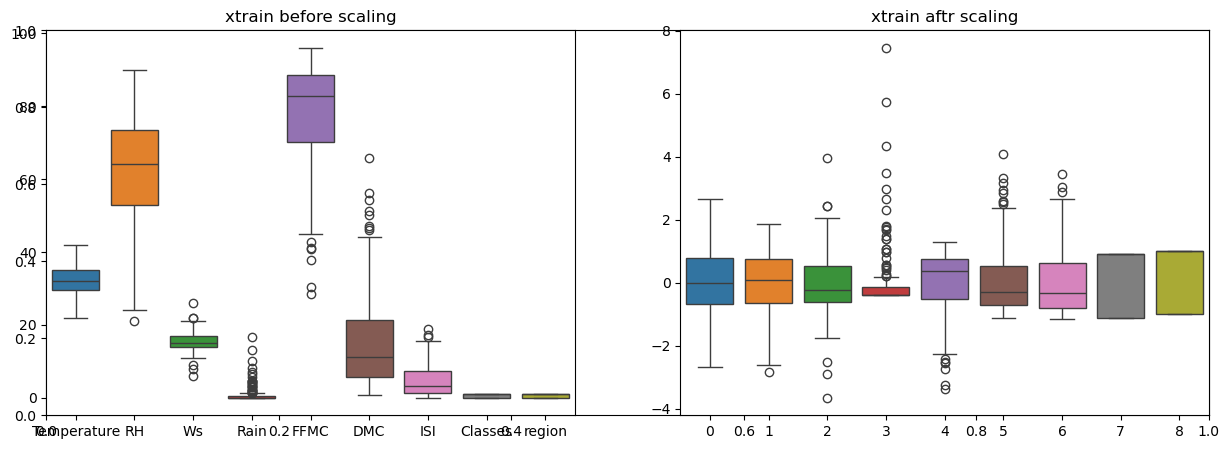

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("xtrain before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("xtrain aftr scaling")


## linear regression model

mae 0.5516452785962681
r2 score 0.990325441548238


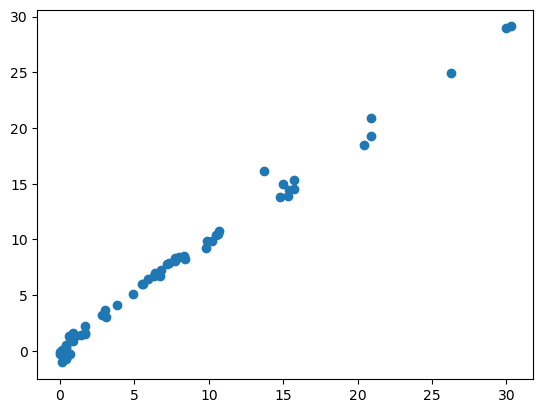

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,Y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("mae",mae)
print('r2 score',score)
plt.scatter(Y_test,y_pred)


## LASSO REGRESSION

mae 1.1862508609509752
r2 score 0.9527186921986257


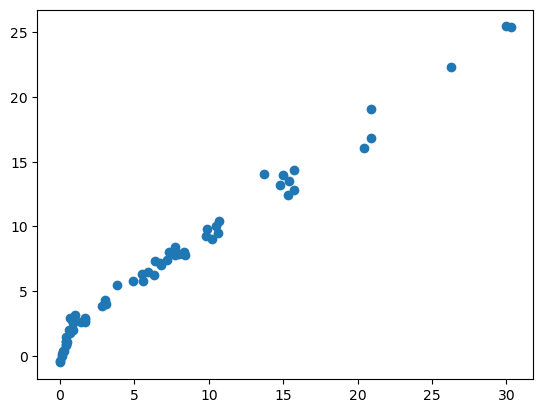

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("mae",mae)
print('r2 score',score)
plt.scatter(Y_test,y_pred)


In [29]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

In [30]:
lassocv.predict(X_test_scaled)

array([ 8.25690144,  7.73876123,  6.96043194,  6.3013042 , 13.87533775,
        1.3733667 , 10.67584411, -1.10473181,  1.76532579, -0.41935509,
        0.52940848,  4.28682616,  1.74498183,  1.50662172, 18.35021578,
        6.84213967, 24.86739032, -0.34988272,  7.35746342,  5.08924691,
        1.73014009,  0.19967226,  8.08295327,  0.20446452, 20.92255961,
       -0.10204819,  5.95075648,  9.82385911,  3.65976889, 14.95597707,
        8.47291707, -0.55620098, 10.42825723, 14.4920687 ,  1.47315003,
        1.49630377,  0.97921736,  5.91956118, -0.50006979, -0.31487077,
        6.56370268,  3.05370741,  3.20925543, -0.52972846, 15.28969178,
        8.42126411,  8.47259235,  1.3313304 , 10.25677561,  9.27514447,
       28.90437722,  2.21599355,  7.99669696, 19.27501692, 13.8403257 ,
       16.07942371, 28.78048122, -0.17032638, -0.38100288, 14.31575487,
        9.92334006])

In [31]:
lassocv.alpha_

0.023540632541152396

In [ ]:
lassocv.alphas_
# ?numb of alphas worked upon

array([6.70445658, 6.25259865, 5.83119443, 5.43819144, 5.07167554,
       4.72986158, 4.41108474, 4.11379239, 3.83653655, 3.57796683,
       3.33682384, 3.11193308, 2.90219921, 2.70660069, 2.52418487,
       2.35406325, 2.19540727, 2.04744417, 1.90945328, 1.78076252,
       1.66074509, 1.54881643, 1.44443138, 1.34708154, 1.25629276,
       1.17162283, 1.09265937, 1.01901779, 0.9503394 , 0.8862897 ,
       0.82655674, 0.77084959, 0.7188969 , 0.67044566, 0.62525986,
       0.58311944, 0.54381914, 0.50716755, 0.47298616, 0.44110847,
       0.41137924, 0.38365366, 0.35779668, 0.33368238, 0.31119331,
       0.29021992, 0.27066007, 0.25241849, 0.23540633, 0.21954073,
       0.20474442, 0.19094533, 0.17807625, 0.16607451, 0.15488164,
       0.14444314, 0.13470815, 0.12562928, 0.11716228, 0.10926594,
       0.10190178, 0.09503394, 0.08862897, 0.08265567, 0.07708496,
       0.07188969, 0.06704457, 0.06252599, 0.05831194, 0.05438191,
       0.05071676, 0.04729862, 0.04411085, 0.04113792, 0.03836

In [ ]:
lassocv.mse_path_
# around500

array([[58.91577975, 44.30507327, 54.66745457, 72.80979441, 36.97248445],
       [54.08220408, 39.12388795, 49.94600549, 69.53150545, 32.4786371 ],
       [48.6362257 , 34.5159559 , 43.94622556, 63.41332128, 28.69216696],
       [43.00655732, 30.48823376, 38.28047424, 58.00762221, 24.90656785],
       [38.00403596, 26.96649955, 33.35790218, 53.22729559, 21.43636669],
       [33.62422836, 23.88611375, 29.08128393, 48.99619187, 18.4914339 ],
       [29.78781779, 21.19074095, 25.36616095, 45.24772242, 15.99826876],
       [26.42585112, 18.83133423, 22.13893688, 40.44635228, 13.89316887],
       [23.47823349, 16.76515197, 19.33610022, 35.76154005, 12.12183164],
       [20.89258276, 14.9549708 , 16.90195488, 31.66385988, 10.63652162],
       [18.62303629, 13.36829407, 14.78823449, 28.07862112,  9.39625565],
       [16.63019294, 11.97685411, 12.9529759 , 24.94051245,  8.36564012],
       [14.87910455, 10.75599145, 11.35969704, 22.19192458,  7.51412578],
       [13.33948285,  9.68420663,  9.9

mae 0.5902255506705574
r2 score 0.989599580707254


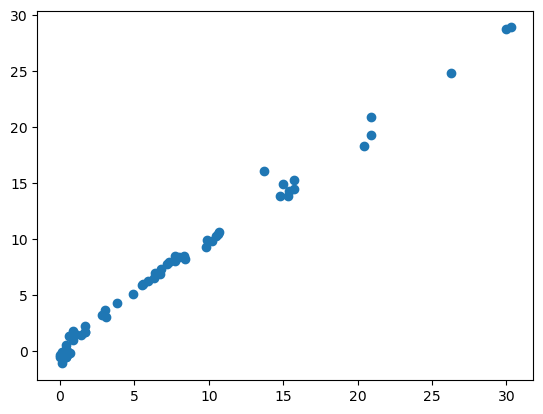

In [36]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("mae",mae)
print('r2 score',score)

## RIDGE REGRESSION

mae 0.5779554428412208
r2 score 0.9896510143175394


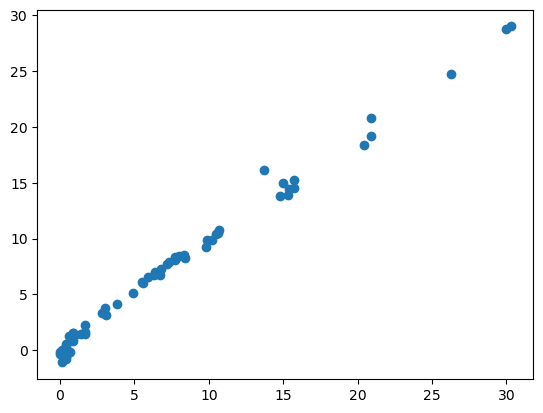

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("mae",mae)
print('r2 score',score)
plt.scatter(Y_test,y_pred)


mae 0.5779554428412208
r2 score 0.9896510143175394


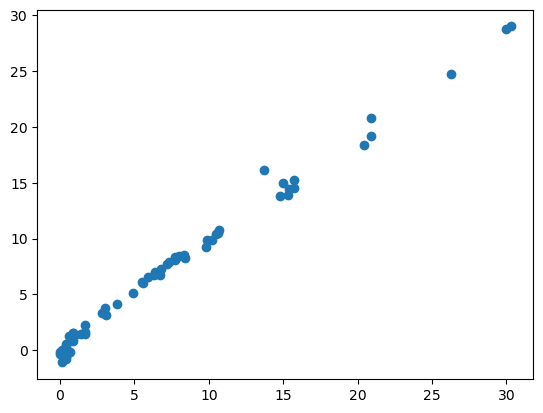

In [37]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("mae",mae)
print('r2 score',score)
plt.scatter(Y_test,y_pred)

In [38]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## elastic net

mae 1.9100570629061813
r2 score 0.8776588851433476


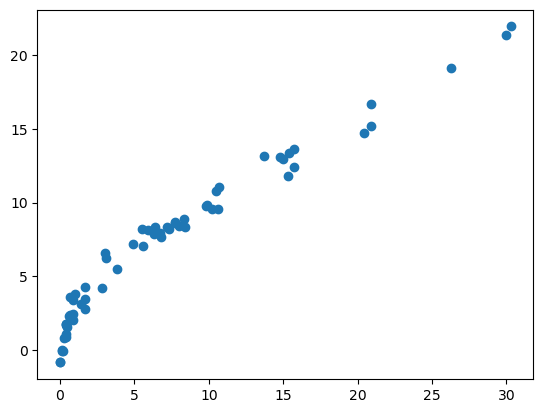

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elstic=ElasticNet()
elstic.fit(X_train_scaled,Y_train)
y_pred=elstic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("mae",mae)
print('r2 score',score)
plt.scatter(Y_test,y_pred)


mae 0.6148342313483073
r2 score 0.9888306667580836


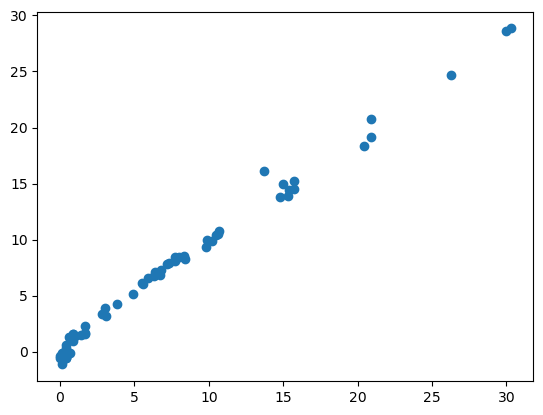

In [39]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,Y_train)
y_pred=elasticcv.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("mae",mae)
print('r2 score',score)
plt.scatter(Y_test,y_pred)

In [40]:
elasticcv.alpha_ #alpha used

0.019006787969382367

In [42]:
# total alphas tested
elasticcv.alphas_

array([13.40891317, 12.5051973 , 11.66238885, 10.87638288, 10.14335107,
        9.45972316,  8.82216948,  8.22758478,  7.67307311,  7.15593366,
        6.67364768,  6.22386616,  5.80439841,  5.41320139,  5.04836973,
        4.70812651,  4.39081454,  4.09488833,  3.81890657,  3.56152504,
        3.32149018,  3.09763286,  2.88886277,  2.69416309,  2.51258551,
        2.34324566,  2.18531874,  2.03803557,  1.9006788 ,  1.77257941,
        1.65311349,  1.54169917,  1.43779381,  1.34089132,  1.25051973,
        1.16623889,  1.08763829,  1.01433511,  0.94597232,  0.88221695,
        0.82275848,  0.76730731,  0.71559337,  0.66736477,  0.62238662,
        0.58043984,  0.54132014,  0.50483697,  0.47081265,  0.43908145,
        0.40948883,  0.38189066,  0.3561525 ,  0.33214902,  0.30976329,
        0.28888628,  0.26941631,  0.25125855,  0.23432457,  0.21853187,
        0.20380356,  0.19006788,  0.17725794,  0.16531135,  0.15416992,
        0.14377938,  0.13408913,  0.12505197,  0.11662389,  0.10